In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv('Salary.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0


In [5]:
df['Age of Employment']=df['Age']-df['Years of Experience']
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,Age of Employment
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0,27.0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0,25.0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1,30.0
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0,29.0
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0,32.0


In [6]:
def findOutliers(arr):
    Q1 = np.percentile(arr, 25, method='midpoint')
    Q3 = np.percentile(arr, 75, method='midpoint')
    IQR = Q3 - Q1
    
    bottom = Q1-1.5*IQR
    top = Q3+1.5*IQR
    print('Нижняя граница нормы: ',bottom,' Верхняя граница нормы: ',top)
    outliers = np.array((arr >= top) | (arr <= bottom))
    return outliers.sum()

In [7]:
df[df.duplicated()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,Age of Employment
252,28.0,Male,1,Business Development Associate,2.0,40000.0,USA,Asian,0,26.0
308,29.0,Female,1,Business Development Associate,1.5,35000.0,Australia,White,0,27.5
343,33.0,Male,1,Business Analyst,4.0,60000.0,Canada,Black,0,29.0
372,44.0,Female,3,Business Analyst,15.0,150000.0,UK,White,1,29.0
390,31.0,Female,1,Software Engineer,6.0,155000.0,UK,Welsh,0,25.0
...,...,...,...,...,...,...,...,...,...,...
6663,51.0,Female,2,Content Marketing Manager,19.0,190000.0,UK,White,0,32.0
6664,37.0,Male,1,Sales Director,7.0,90000.0,China,Chinese,0,30.0
6672,24.0,Male,1,Sales Executive,1.0,35000.0,Canada,Asian,0,23.0
6677,51.0,Female,2,Product Marketing Manager,19.0,190000.0,UK,White,1,32.0


In [8]:
df_new=df.drop_duplicates()
df_new[df_new.duplicated()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,Age of Employment


In [9]:
Age = np.array(df_new['Age'])
Gender = np.array(df_new['Gender'])
EL = np.array(df_new['Education Level'])
Job = np.array(df_new['Job Title'])
Year_exp = np.array(df_new['Years of Experience'])
Salary = np.array(df_new['Salary'])
Country = np.array(df_new['Country'])
Race = np.array(df_new['Race'])
Senior = np.array(df_new['Senior'])
Age_emp = np.array(df_new['Age of Employment'])

print('Количество выбросов для Age: ' + str(findOutliers(Age)))
print('Количество пропусков для Age: ' + str(df_new['Age'].isna().sum())+ '\n')
print('Количество пропусков для Gender: ' + str(df_new['Gender'].isna().sum())+ '\n')
print('Количество выбросов для Education Level: ' + str(findOutliers(EL)))
print('Количество пропусков для Education Level: ' + str(df_new['Education Level'].isna().sum())+ '\n')
print('Количество пропусков для Job: ' + str(df_new['Job Title'].isna().sum())+ '\n')
print('Количество выбросов для Years of Experience: ' + str(findOutliers(Year_exp)))
print('Количество пропусков для Years of Experience: ' + str(df_new['Years of Experience'].isna().sum())+ '\n')
print('Количество выбросов для Salary: ' + str(findOutliers(Salary)))
print('Количество пропусков для Salary: ' + str(df_new['Salary'].isna().sum())+ '\n')
print('Количество пропусков для Country: ' + str(df_new['Country'].isna().sum())+ '\n')
print('Количество пропусков для Race: ' + str(df_new['Race'].isna().sum())+ '\n')
print('Количество пропусков для Senior: ' + str(df_new['Senior'].isna().sum())+ '\n')
print('Количество выбросов для Age of Employment: ' + str(findOutliers(Age_emp)))
print('Количество пропусков для Age of Employment: ' + str(df['Age of Employment'].isna().sum()))

Нижняя граница нормы:  11.5  Верхняя граница нормы:  55.5
Количество выбросов для Age: 38
Количество пропусков для Age: 0

Количество пропусков для Gender: 0

Нижняя граница нормы:  -0.5  Верхняя граница нормы:  3.5
Количество выбросов для Education Level: 0
Количество пропусков для Education Level: 0

Количество пропусков для Job: 0

Нижняя граница нормы:  -10.5  Верхняя граница нормы:  25.5
Количество выбросов для Years of Experience: 66
Количество пропусков для Years of Experience: 0

Нижняя граница нормы:  -65000.0  Верхняя граница нормы:  295000.0
Количество выбросов для Salary: 0
Количество пропусков для Salary: 0

Количество пропусков для Country: 0

Количество пропусков для Race: 0

Количество пропусков для Senior: 0

Нижняя граница нормы:  19.5  Верхняя граница нормы:  31.5
Количество выбросов для Age of Employment: 221
Количество пропусков для Age of Employment: 0


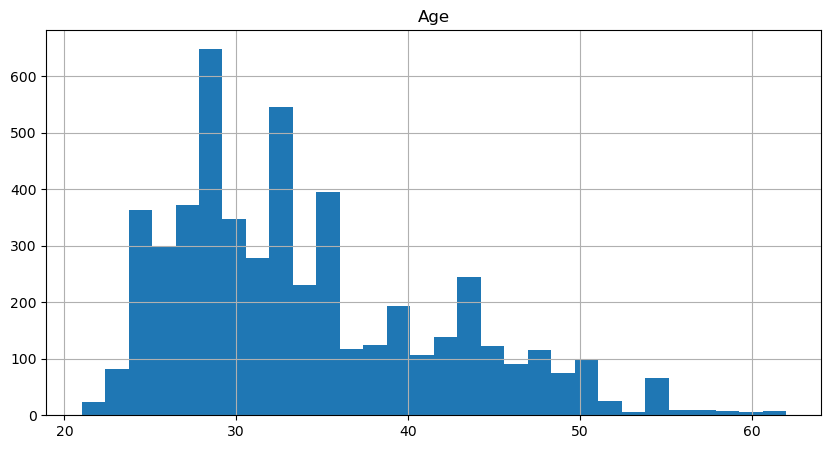

In [10]:
plt.figure(figsize=(10, 5))
plt.hist(df_new['Age'], bins=30);
plt.grid(True)
plt.title('Age')
plt.show()

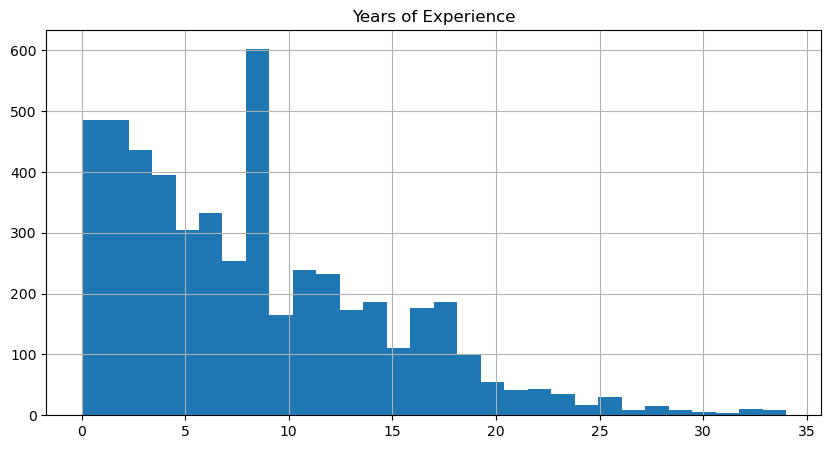

In [11]:
plt.figure(figsize=(10, 5))
plt.hist(df_new['Years of Experience'], bins=30);
plt.grid(True)
plt.title('Years of Experience')
plt.show()

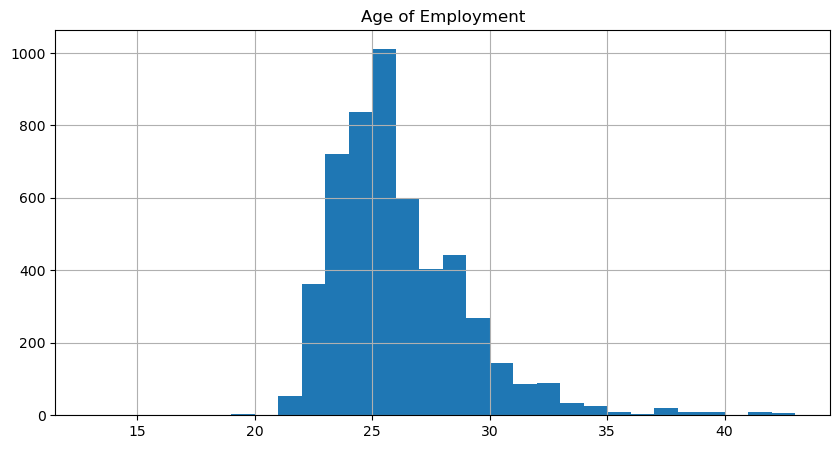

In [12]:
plt.figure(figsize=(10, 5))
plt.hist(df_new['Age of Employment'], bins=30);
plt.grid(True)
plt.title('Age of Employment')
plt.show()

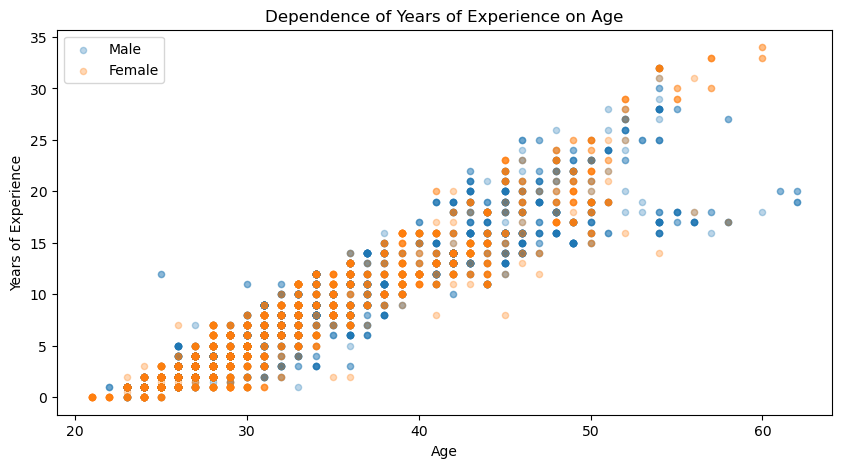

In [13]:
plt.figure(figsize=(10, 5));
for gender in ['Male', 'Female']:
    plt.scatter(x = 'Age', y = 'Years of Experience', data = df_new[df_new['Gender'] == gender],
                s = 20, alpha = 0.3, label = gender)
plt.legend()
plt.xlabel('Age');
plt.ylabel('Years of Experience');
plt.title('Dependence of Years of Experience on Age');
plt.show()

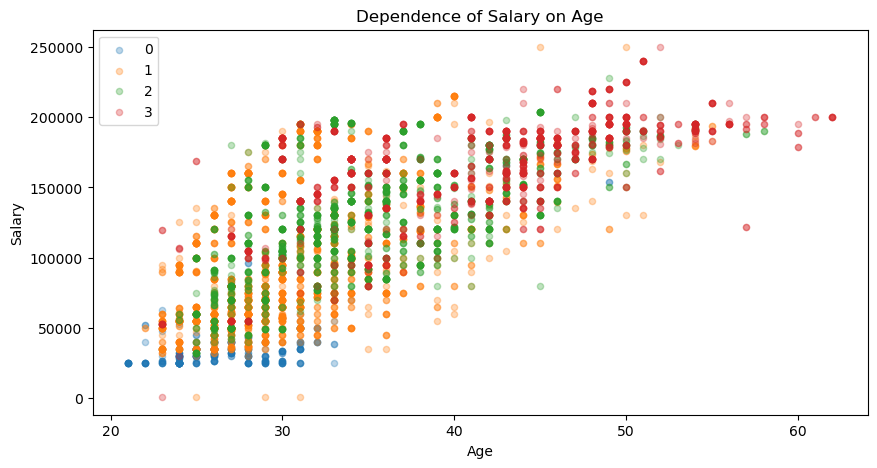

In [14]:
plt.figure(figsize=(10, 5));
for education in [0, 1, 2, 3]:
    plt.scatter(x = 'Age', y = 'Salary', data = df_new[df_new['Education Level'] == education],
                s = 20, alpha = 0.3, label = education)
plt.legend();
plt.xlabel('Age');
plt.ylabel('Salary');
plt.title('Dependence of Salary on Age');
plt.show()

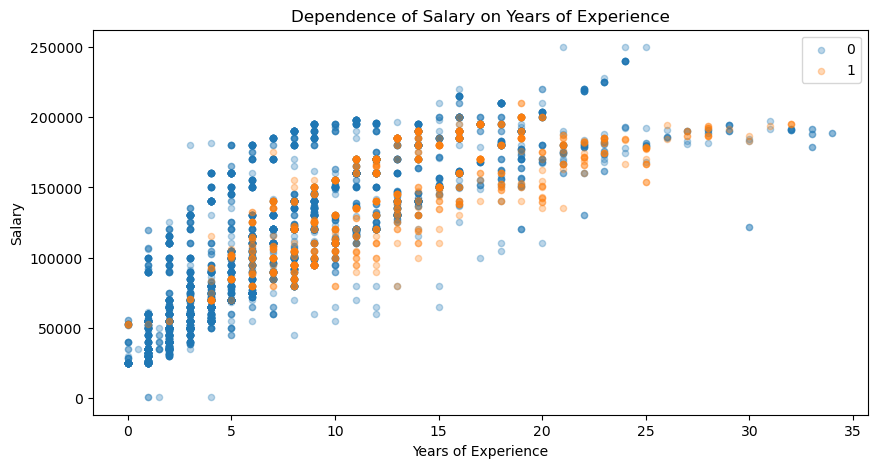

In [15]:
plt.figure(figsize=(10, 5));
for senior in [0, 1]:
    plt.scatter(x = 'Years of Experience', y = 'Salary', data = df_new[df_new['Senior'] == senior],
                s = 20, alpha = 0.3, label = senior)
plt.legend();
plt.xlabel('Years of Experience');
plt.ylabel('Salary');
plt.title('Dependence of Salary on Years of Experience');
plt.show()

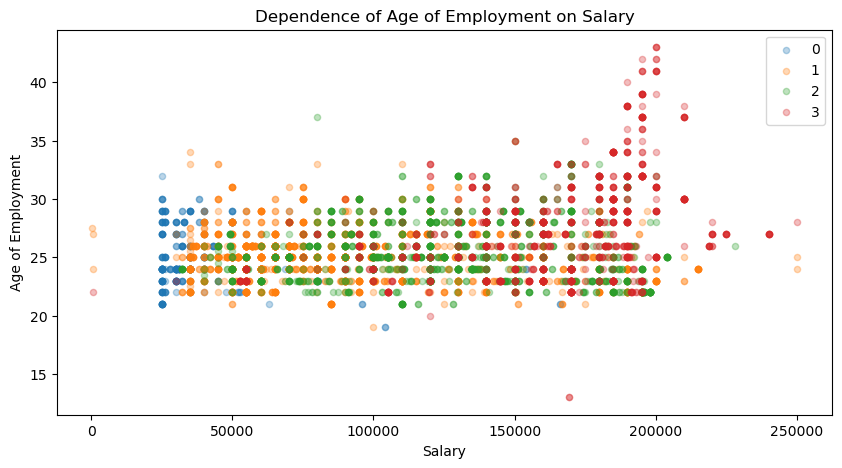

In [16]:
plt.figure(figsize=(10, 5));
for senior in [0, 1, 2, 3]:
    plt.scatter(x = 'Salary', y = 'Age of Employment', data = df_new[df_new['Education Level'] == senior],
                s = 20, alpha = 0.3, label = senior)
plt.legend();
plt.xlabel('Salary');
plt.ylabel('Age of Employment');
plt.title('Dependence of Age of Employment on Salary');
plt.show()

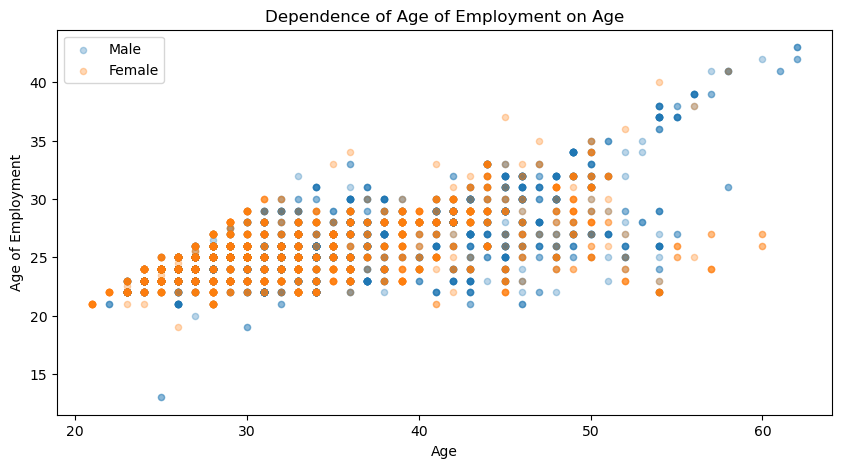

In [17]:
plt.figure(figsize=(10, 5));
for gender in ['Male', 'Female']:
    plt.scatter(x = 'Age', y = 'Age of Employment', data = df_new[df_new['Gender'] == gender],
                s = 20, alpha = 0.3, label = gender)
plt.legend()
plt.xlabel('Age');
plt.ylabel('Age of Employment');
plt.title('Dependence of Age of Employment on Age');
plt.show()

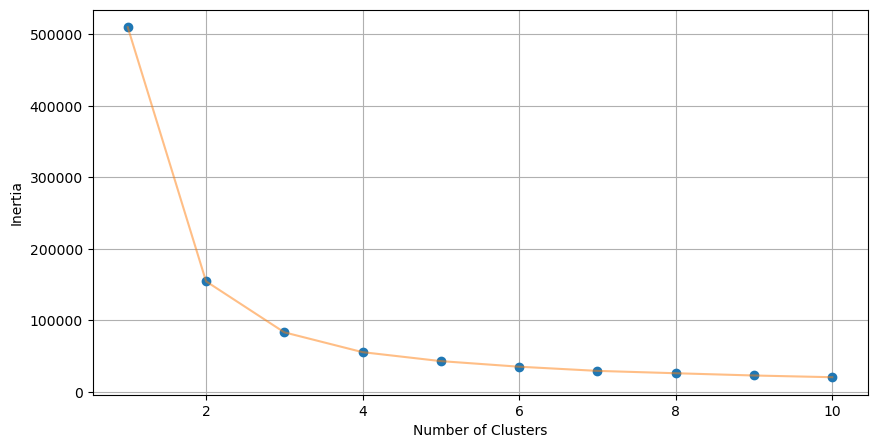

In [18]:
X1 = df_new[['Age', 'Years of Experience']].iloc[: , :].values
inertia = []
for n in range(1, 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001,  random_state= 111 , algorithm='lloyd') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

plt.figure(1, figsize = (10 ,5))
plt.grid()
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

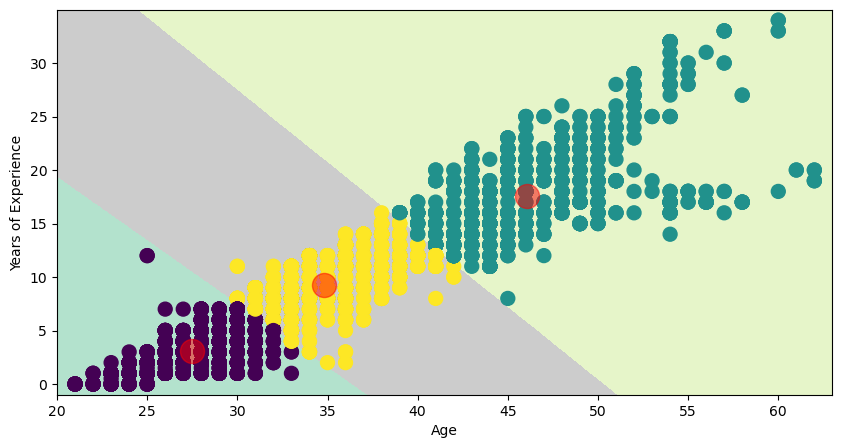

In [57]:
algorithm = (KMeans(n_clusters = 3, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001,  random_state= 111, algorithm='elkan'))
algorithm.fit(X1)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z3 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1, figsize = (10, 5))
plt.clf()
Z3 = Z3.reshape(xx.shape)
plt.imshow(Z3, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter(x = 'Age', y = 'Years of Experience', data = df_new, c = labels3, s = 100 )
plt.scatter(x = centroids3[:, 0], y = centroids3[:, 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Age')
plt.ylabel('Years of Experience')
plt.show()

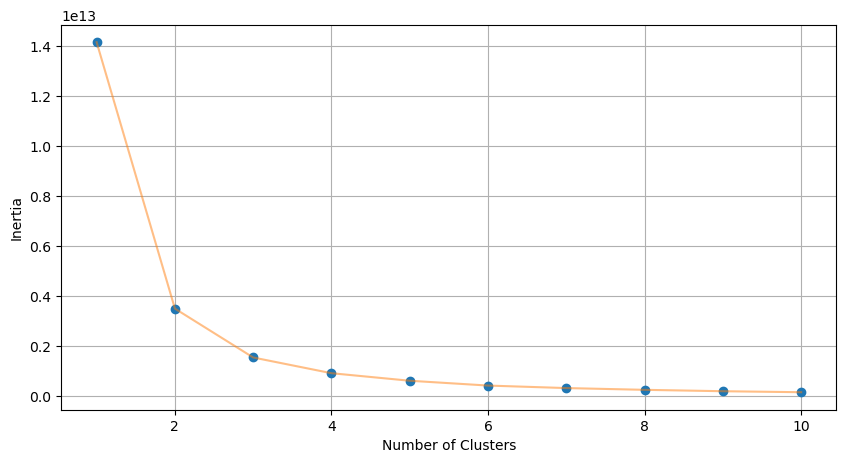

In [20]:
X2 = df_new[['Age', 'Salary']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001,  random_state= 111 , algorithm='lloyd'))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)
plt.figure(1, figsize = (10, 5))
plt.grid()
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

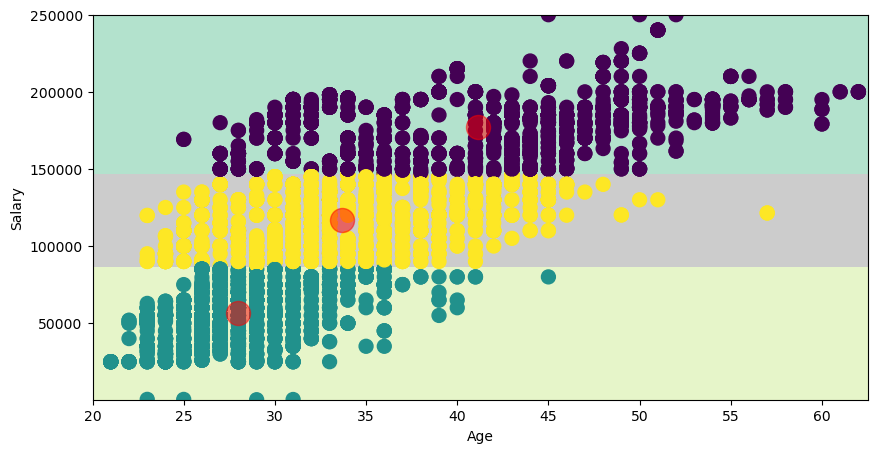

In [21]:
algorithm = (KMeans(n_clusters = 3, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001,  random_state= 111 , algorithm='elkan'))
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.5
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
#print(np.shape(np.meshgrid(np.arange(x_min, x_max, h), np.arange(1, 10, h))))
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1, figsize = (10, 5))
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter(x = 'Age', y = 'Salary', data = df_new, c = labels2, s = 100 )
plt.scatter(x = centroids2[:, 0], y = centroids2[:, 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

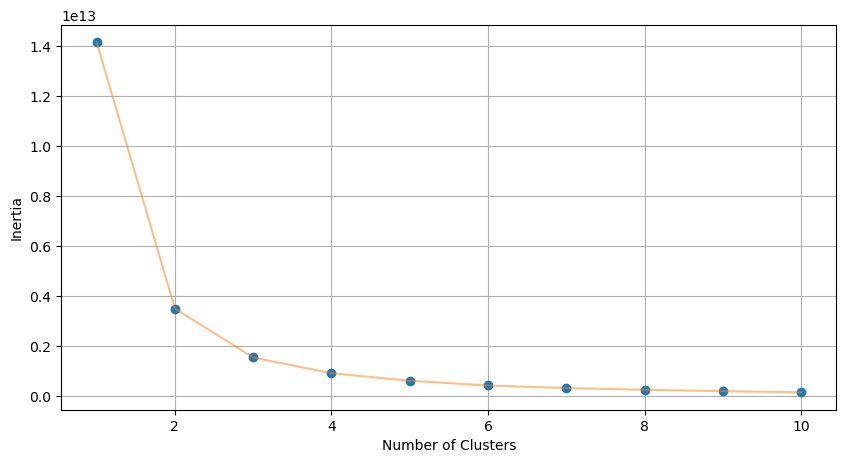

In [22]:
X3 = df_new[['Years of Experience' , 'Salary']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='lloyd') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

plt.figure(1 , figsize = (10 ,5))
plt.grid()
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

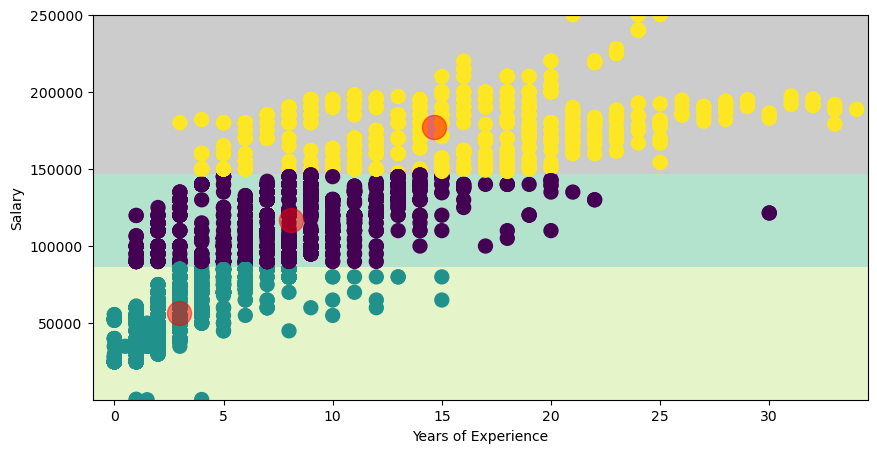

In [23]:
algorithm = (KMeans(n_clusters = 3, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001,  random_state= 111, algorithm='elkan'))
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

h = 0.5
x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z3 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1, figsize = (10, 5))
plt.clf()
Z3 = Z3.reshape(xx.shape)
plt.imshow(Z3, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter(x = 'Years of Experience', y = 'Salary', data = df_new, c = labels3, s = 100 )
plt.scatter(x = centroids3[:, 0], y = centroids3[:, 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

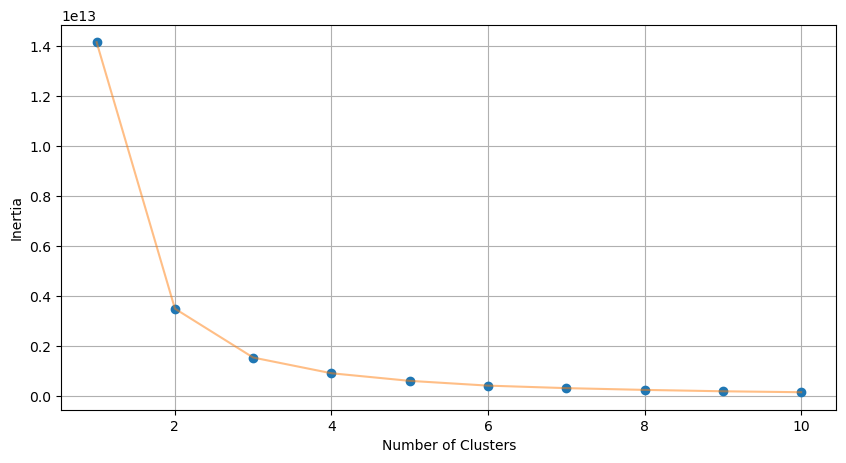

In [24]:
X4 = df_new[['Salary', 'Age of Employment']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001,  random_state= 111, algorithm='lloyd') )
    algorithm.fit(X4)
    inertia.append(algorithm.inertia_)

plt.figure(1, figsize = (10, 5))
plt.grid()
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

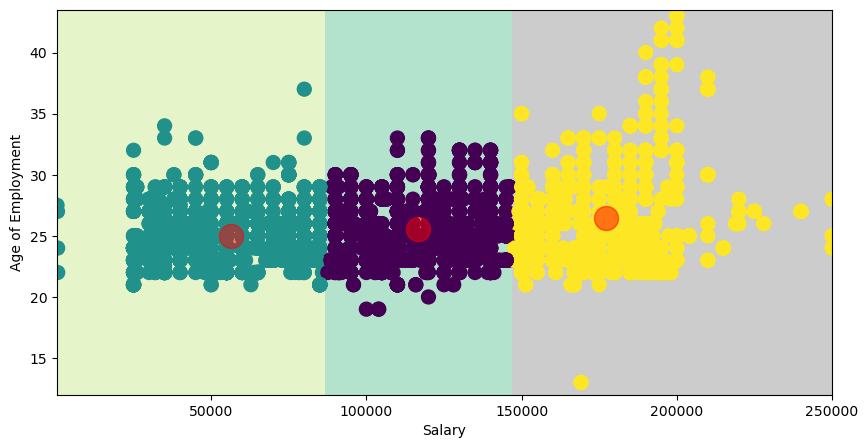

In [25]:
algorithm = (KMeans(n_clusters = 3, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001,  random_state= 111, algorithm='elkan') )
algorithm.fit(X4)
labels4 = algorithm.labels_
centroids4 = algorithm.cluster_centers_
h = 0.5
x_min, x_max = X4[:, 0].min() - 1, X4[:, 0].max() + 1
y_min, y_max = X4[:, 1].min() - 1, X4[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z4 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1, figsize = (10, 5))
plt.clf()
Z4 = Z4.reshape(xx.shape)
plt.imshow(Z4, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter(x = 'Salary', y = 'Age of Employment', data = df_new, c = labels4, s = 100 )
plt.scatter(x = centroids4[:, 0], y = centroids4[:, 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Salary')
plt.ylabel('Age of Employment')
plt.show()

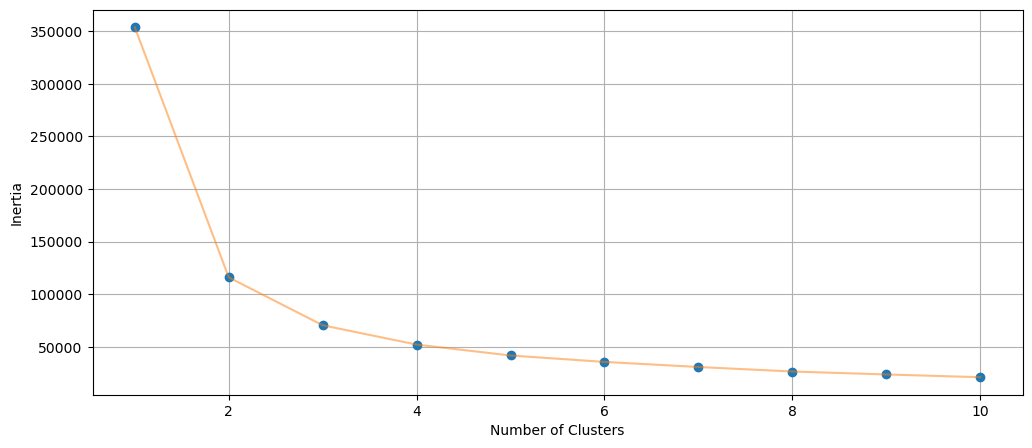

In [26]:
X5 = df_new[['Age', 'Age of Employment']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001,  random_state= 111, algorithm='lloyd') )
    algorithm.fit(X5)
    inertia.append(algorithm.inertia_)

plt.figure(1, figsize = (12, 5))
plt.grid()
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

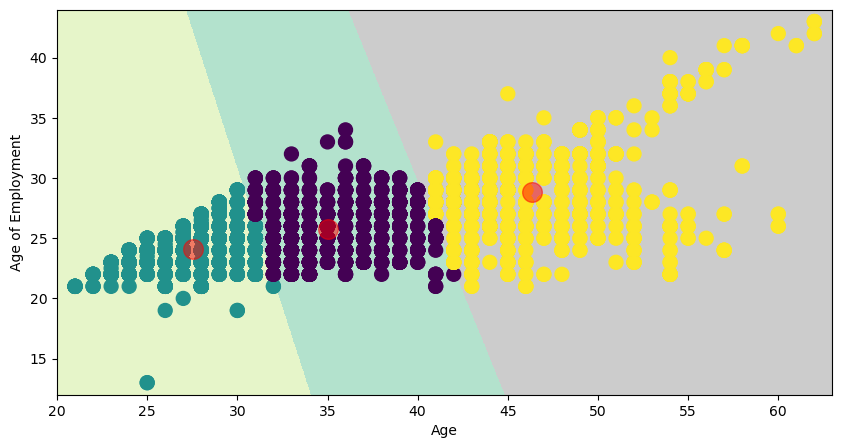

In [27]:
algorithm = (KMeans(n_clusters = 3, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001,  random_state= 111, algorithm='elkan') )
algorithm.fit(X5)
labels5 = algorithm.labels_
centroids5 = algorithm.cluster_centers_
h = 0.02
x_min, x_max = X5[:, 0].min() - 1, X5[:, 0].max() + 1
y_min, y_max = X5[:, 1].min() - 1, X5[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z5 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1, figsize = (10, 5))
plt.clf()
Z5 = Z5.reshape(xx.shape)
plt.imshow(Z5, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter(x = 'Age', y = 'Age of Employment', data = df_new, c = labels5, s = 100 )
plt.scatter(x = centroids5[:, 0], y = centroids5[:, 1], s = 200, c = 'red', alpha = 0.5)
plt.xlabel('Age')
plt.ylabel('Age of Employment')
plt.show()